<a href="https://colab.research.google.com/github/OnePassio/CE888/blob/master/Lab2_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook you'll create your own bootstrap function following the bootstrap algorithm (check the lecture notes!)

In [0]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np



In [5]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]
print(data);

[ 2.  8. 20. 13.  5.  9. 10.  8. 22. 10.  2.  4.  7.  9.]


In [0]:
# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Create an array of samples of shape (n_iterations, sample_size)
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
# 3. In each iteration:
# 3.1 Get the data corresponding to that iteration (new_samples[iteration, :])
# 3.2 Calculate the mean of the iteration data and store it
# (At this point you should have an array of n_iterations values)
# 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval
def boostrap_mean(sample, sample_size, n_iterations):
# <---CODING--->
	list_data_mean=[]
	count=0
	while(count<n_iterations):
		shape=np.random.choice(sample, sample_size, replace=True)
		# mean
		mean_shape=np.mean(shape);
		list_data_mean.append(mean_shape)
		# percentile
		
		#continue counting
		count+=1;
	#end while
	
	data_mean=np.nanmean(list_data_mean);
	lower=np.percentile(list_data_mean, 95, interpolation='lower')
	upper=np.percentile(list_data_mean, 95, interpolation='higher')
	#test
	print(data_mean);
	print(lower);
	print(upper);

	return data_mean, lower, upper

#test
#boostrap_mean (data,4,2);


9.010000000000002
11.5
12.071428571428571
9.212402597402598
11.785714285714286
11.785714285714286
9.225714285714286
11.928571428571429
11.928571428571429
9.235483870967743
11.785714285714286
11.857142857142858
9.220243902439025
11.928571428571429
11.928571428571429
9.191778711484595
11.785714285714286
11.785714285714286
9.236744730679156
11.857142857142858
11.857142857142858
9.220201207243463
11.785714285714286
11.785714285714286
9.197813051146383
11.857142857142858
11.857142857142858
9.193076923076923
11.785714285714286
11.785714285714286
9.208302687411598
11.857142857142858
11.857142857142858
9.224864864864864
11.857142857142858
11.857142857142858
9.221428571428572
11.785714285714286
11.857142857142858
9.209825517993457
11.857142857142858
11.857142857142858
9.225506585612969
11.857142857142858
11.857142857142858
9.233008514664144
11.785714285714286
11.785714285714286
9.219986690328307
11.857142857142858
11.857142857142858
9.22262740183793
11.785714285714286
11.785714285714286
9.20755

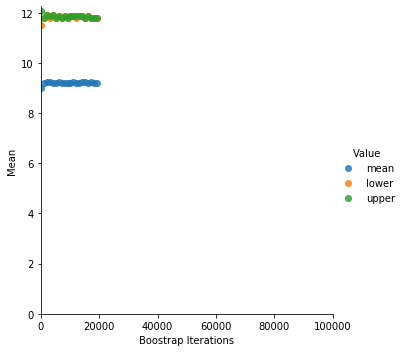

In [31]:
# Call your bootstrap function and plot the results

boots = []
for i in range(100, 20000, 1000):
    boot = boostrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

sns_plot.savefig("bootstrap_confidence.png", bbox_inches='tight')
#sns_plot.savefig("bootstrap_confidence.pdf", bbox_inches='tight')
#from google.colab import files
#files.download('bootstrap_confidence.png') 




Now, modify the bootstrap function so that you can pass your desired confidence interval as a parameter.



In [0]:
def boostrap_mean_ci(sample, sample_size, n_iterations, ci):
# <---CODING--->
	list_data_mean=[]
	count=0;
	while(count<n_iterations):
		shape=np.random.choice(sample, sample_size, replace=True)
		# mean
		mean_shape=np.mean(shape);
		list_data_mean.append(mean_shape)
		# percentile
		
		#continue counting
		count+=1;
	#end while
	
	data_mean=np.mean(list_data_mean);
	lower=np.percentile(list_data_mean, ci, interpolation='lower')
	upper=np.percentile(list_data_mean, ci, interpolation='higher')
	#test
	print(data_mean);
	print(lower);
	print(upper);

	return data_mean, lower, upper

9.045714285714284
10.5
10.642857142857142
9.233896103896104
10.5
10.5
9.253979591836734
10.5
10.5
9.216336405529953
10.428571428571429
10.428571428571429
9.225609756097562
10.5
10.5
9.21781512605042
10.5
10.5
9.241814988290399
10.5
10.5
9.22430583501006
10.5
10.5
9.209594356261023
10.5
10.5
9.176240188383044
10.428571428571429
10.428571428571429
9.21885431400283
10.5
10.5
9.20135135135135
10.5
10.5
9.200312868949233
10.5
10.5
9.206663031624863
10.5
10.5
9.21226443768997
10.5
10.5
9.225515610217599
10.5
10.5
9.215048802129548
10.428571428571429
10.428571428571429
9.206963241436926
10.5
10.5
9.204550118389898
10.428571428571429
10.428571428571429
9.211810022438295
10.5
10.5
9.213884150675197
10.5
10.5
9.213439404197697
10.5
10.5
9.216968325791855
10.5
10.5
9.220318491032778
10.5
10.5
9.214036751630113
10.5
10.5
9.201747296528174
10.5
10.5
9.198448275862068
10.5
10.5
9.22109910384818
10.5
10.5
9.223548551093035
10.5
10.5
9.216337751595482
10.5
10.5
9.205972947318461
10.428571428571429
10.

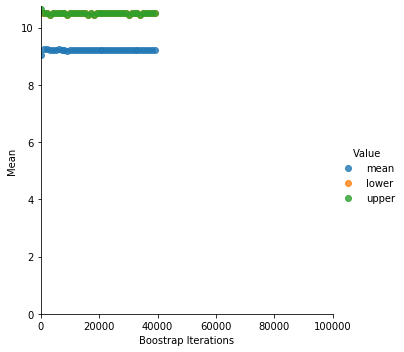

In [32]:

boots = []
for i in range(100, 40000, 1000):
    boot = boostrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

sns_plot.savefig("bootstrap_confidence_80.png", bbox_inches='tight')
#sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')
#from google.colab import files
#files.download('bootstrap_confidence_80.png') 


# Vehicles dataset

Now let's work on a different dataset. Load the vehicles.csv file and check the Moodle page for instructions on how to proceed


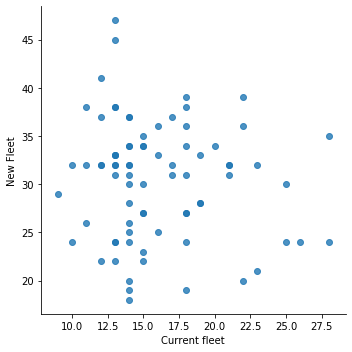

In [37]:
# Load and visualise the vehicles dataset
# <---INSERT YOUR CODE HERE--->
dfVehicle = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')
dfVehicle = dfVehicle.apply (pd.to_numeric, errors='coerce')
dfVehicle = dfVehicle.dropna() #remove nan
dataCurrentFleet = dfVehicle.values.T[0]
dataNewFleet= dfVehicle.values.T[1]
sns.lmplot(dfVehicle.columns[0],dfVehicle.columns[1],
data=dfVehicle, fit_reg=False)


#sns.scatterplot(x="CurrentFleed", y="NewFleed", data=dfVehicle)

# Note: you can add more cells as needed to organise your code and your plots


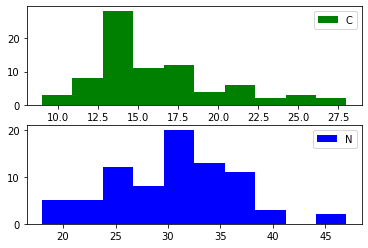

In [38]:

import matplotlib.pyplot as plt
plt.subplot(2,1,1)
plt.hist(dataCurrentFleet,color='g')
plt.legend("Current Fleet");
#plot cumulative dist
plt.subplot(2,1,2)
plt.hist(dataNewFleet,color='b')
plt.title="New Fleet";
plt.legend("New Fleet");

In [12]:
# Compare the two fleets.
# You can create a permutation test function to do this. Check the lecture notes!

meanCurrentFleet=np.nanmean(dataCurrentFleet)
sigmaCF=np.std(dataCurrentFleet)
meanNewFleet=np.nanmean(dataNewFleet);


print("mean Current Fleets={}".format(meanCurrentFleet))
print("mean New Fleets={}".format(meanNewFleet))

mean Current Fleets=20.14457831325301
mean New Fleets=30.481012658227847


# Find the upper and lower bound of the mean of the current fleet.

20.1174297188755
20.662650602409638
20.686746987951807
20.131854691493245
20.803212851405622
20.803212851405622
20.14856760374833
20.811244979919678
20.815261044176708
20.153114393056097
20.82730923694779
20.82730923694779
20.14216377705946
20.80722891566265
20.811244979919678
20.13924167257264
20.803212851405622
20.803212851405622
20.15370926328264
20.815261044176708
20.815261044176708
20.146925165450536
20.83132530120482
20.83132530120482
20.14523079974218
20.815261044176708
20.815261044176708
20.136538240875588
20.811244979919678
20.811244979919678
20.138901347966122
20.823293172690764
20.823293172690764
20.14085567495206
20.80722891566265
20.811244979919678
20.147638819741776
20.80722891566265
20.80722891566265
20.14793004077378
20.83132530120482
20.83132530120482
20.146732746589194
20.819277108433734
20.819277108433734
20.13854889757706
20.80722891566265
20.80722891566265
20.13989323754646
20.819277108433734
20.819277108433734
20.143646163601776
20.819277108433734
20.8192771084337

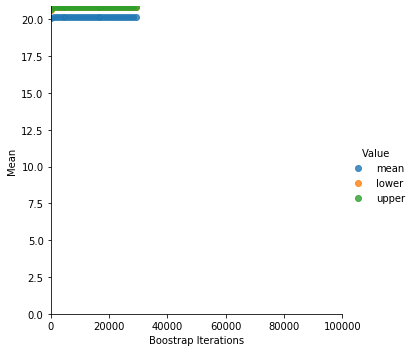

In [36]:
boots = []
for i in range(100, 30000, 1000):
    boot = boostrap_mean(dataCurrentFleet, dataCurrentFleet.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

sns_plot.savefig("Vehicle_current_freet_bootstrap_confidence.png", bbox_inches='tight')
#sns_plot.savefig("bootstrap_confidence.pdf", bbox_inches='tight')
from google.colab import files
#files.download('Vehicle_current_freet_bootstrap_confidence.png') 

#Find the upper and lower bound of the mean of the New fleet.

30.551265822784806
31.72151898734177
31.746835443037973
30.52481012658228
31.68354430379747
31.68354430379747
30.4896383363472
31.582278481012658
31.582278481012658
30.477954267047778
31.569620253164558
31.569620253164558
30.483084285273232
31.59493670886076
31.60759493670886
30.471186398610076
31.569620253164558
31.569620253164558
30.467565885038386
31.59493670886076
31.59493670886076
30.47253877696559
31.59493670886076
31.59493670886076
30.481057977809034
31.60759493670886
31.620253164556964
30.48110585616915
31.59493670886076
31.59493670886076
30.482022809875925
31.582278481012658
31.582278481012658
30.48038886988254
31.59493670886076
31.59493670886076
30.473008682916625
31.59493670886076
31.59493670886076
30.486026669243405
31.620253164556964
31.620253164556964
30.483051440883383
31.620253164556964
31.620253164556964
30.481975018861597
31.60759493670886
31.60759493670886
30.476356631810674
31.582278481012658
31.582278481012658
30.478942186690354
31.59493670886076
31.59493670886076


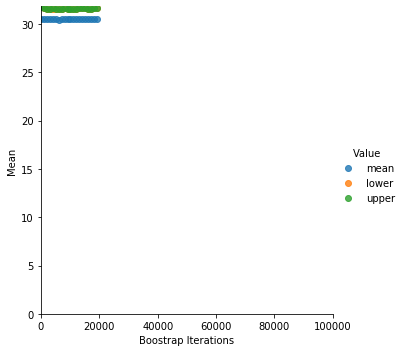

In [40]:

boots = []
for i in range(100, 20000, 1000):
    boot = boostrap_mean(dataNewFleet, dataNewFleet.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

sns_plot.savefig("Vehicle_current_freet_bootstrap_confidence.png", bbox_inches='tight')
#sns_plot.savefig("bootstrap_confidence.pdf", bbox_inches='tight')
from google.colab import files
#files.download('Vehicle_current_freet_bootstrap_confidence.png') 